<a href="https://colab.research.google.com/github/cwp-kr/ML-class/blob/main/%EA%B8%B0%EB%A7%90%EA%B3%A0%EC%82%AC20250613.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **기말고사(20250613)**
학번 : 2020142036            
성명 : 최원필

# **문제 1) ANN Backpropagation**

In [147]:
# Back-propagation of ANN with numpy
import numpy as np
import matplotlib.pyplot as plt

# Data Generation
np.random.seed(0)
samples = 300

x1 = np.random.uniform(0, 1, samples)
x2 = np.random.uniform(0, 1, samples)
x3 = np.random.uniform(0, 1, samples)

# Target
y = 3 * x1 - 2 * x2 + x3

<ipython-input-158-690976198>:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][0] += -alpha * dJdW1_11
<ipython-input-158-690976198>:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][1] += -alpha * dJdW1_12
<ipython-input-158-690976198>:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][2] += -alpha * dJdW1_13
<ipython-input-158-690976198>:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in fut

MSE and MAPE at epoch  0  : 0.6041122574070575  , 342.4182837188454
MSE and MAPE at epoch  5  : 0.5415623891897512  , 296.304105268533
MSE and MAPE at epoch  10  : 0.3916209973281701  , 256.88686150869
MSE and MAPE at epoch  15  : 0.13062263423682066  , 144.91725800490602
MSE and MAPE at epoch  20  : 0.02484886892791221  , 48.02379533758397
MSE and MAPE at epoch  25  : 0.006721883078061445  , 12.704506362427017
MSE and MAPE at epoch  30  : 0.0038297813160777937  , 16.244687074468352
MSE and MAPE at epoch  35  : 0.003223178071680349  , 19.910329529004134
MSE and MAPE at epoch  40  : 0.003030564221976462  , 21.294668598098482
MSE and MAPE at epoch  45  : 0.002930553304425689  , 21.7342607756392
MSE and MAPE at epoch  50  : 0.0028576883791757925  , 21.807404670869683
MSE and MAPE at epoch  55  : 0.0027961979995298324  , 21.730862502886062
MSE and MAPE at epoch  60  : 0.0027411582387831647  , 21.59627540981394
MSE and MAPE at epoch  65  : 0.0026904515274485687  , 21.439572886599795
MSE and

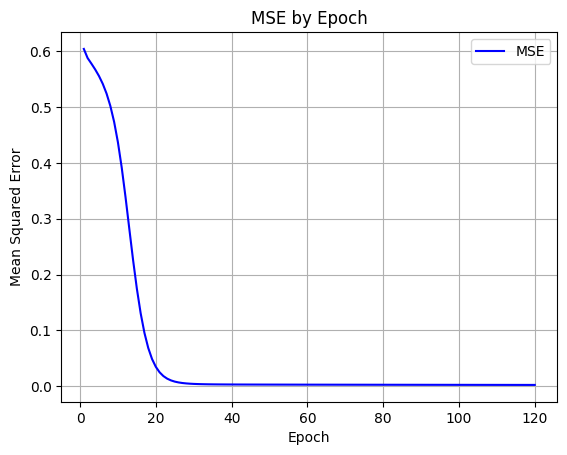

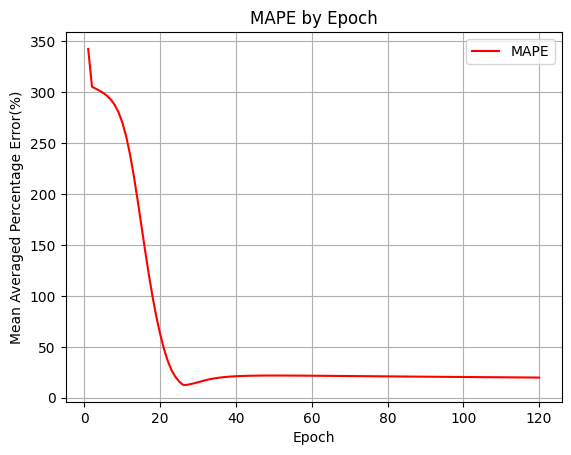

In [158]:
Input = np.column_stack((x1,x2,x3))


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

input_layer_size = 3
hidden_layer_size = 4
output_layer_size = 1

W1 = np.random.rand(hidden_layer_size, input_layer_size)
b1 = np.random.rand(hidden_layer_size)
W2 = np.random.rand(output_layer_size, hidden_layer_size)
b2 = np.random.rand(output_layer_size)

alpha = 1e-2
epochs = 120
MSE_list, MAPE_list = [], []
for epoch in range(epochs):
    MSE, MAPE = 0,0
    for iter in range(samples):
        X = Input[iter]

        Z_tilde = W1@X.reshape(-1,1)+ b1.reshape(-1,1)
        Z = sigmoid(Z_tilde)
        y_pred = W2@Z.reshape(-1,1) + b2.reshape(-1,1)


        J = 1/2*(y_pred-y[iter])**2
        MSE += J
        MAPE += np.abs((y_pred-y[iter])/y[iter])*100


        dJdY = (y_pred-y[iter])
        dJdW2_11, dJdW2_12, dJdW2_13, dJdW2_14 = dJdY*Z[0], dJdY*Z[1], dJdY*Z[2], dJdY*Z[3]
        dJdb2_1 = dJdY
        dJdZ1, dJdZ2, dJdZ3, dJdZ4 = dJdY*W2[0,0], dJdY*W2[0,1], dJdY*W2[0,2], dJdY*W2[0,3]


        dJdW1_11 = dJdZ1 * X[0] * sigmoid_derivative(Z_tilde[0])
        dJdW1_12 = dJdZ1 * X[1] * sigmoid_derivative(Z_tilde[0])
        dJdW1_13 = dJdZ1 * X[2] * sigmoid_derivative(Z_tilde[0])
        dJdW1_21 = dJdZ2 * X[0] * sigmoid_derivative(Z_tilde[1])
        dJdW1_22 = dJdZ2 * X[1] * sigmoid_derivative(Z_tilde[1])
        dJdW1_23 = dJdZ2 * X[2] * sigmoid_derivative(Z_tilde[1])
        dJdW1_31 = dJdZ3 * X[0] * sigmoid_derivative(Z_tilde[2])
        dJdW1_32 = dJdZ3 * X[1] * sigmoid_derivative(Z_tilde[2])
        dJdW1_33 = dJdZ3 * X[2] * sigmoid_derivative(Z_tilde[2])
        dJdW1_41 = dJdZ4 * X[0] * sigmoid_derivative(Z_tilde[3])
        dJdW1_42 = dJdZ4 * X[1] * sigmoid_derivative(Z_tilde[3])
        dJdW1_43 = dJdZ4 * X[2] * sigmoid_derivative(Z_tilde[3])
        dJdb1_1 = dJdZ1 * sigmoid_derivative(Z_tilde[0])
        dJdb1_2 = dJdZ2 * sigmoid_derivative(Z_tilde[1])
        dJdb1_3 = dJdZ3 * sigmoid_derivative(Z_tilde[2])
        dJdb1_4 = dJdZ4 * sigmoid_derivative(Z_tilde[3])

        W1[0][0] += -alpha * dJdW1_11
        W1[0][1] += -alpha * dJdW1_12
        W1[0][2] += -alpha * dJdW1_13
        W1[1][0] += -alpha * dJdW1_21
        W1[1][1] += -alpha * dJdW1_22
        W1[1][2] += -alpha * dJdW1_23
        W1[2][0] += -alpha * dJdW1_31
        W1[2][1] += -alpha * dJdW1_32
        W1[2][2] += -alpha * dJdW1_33
        W1[3][0] += -alpha * dJdW1_41
        W1[3][1] += -alpha * dJdW1_42
        W1[3][2] += -alpha * dJdW1_43
        b1[0] += -alpha * dJdb1_1
        b1[1] += -alpha * dJdb1_2
        b1[2] += -alpha * dJdb1_3
        b1[3] += -alpha * dJdb1_4
        W2[0][0] += -alpha * dJdW2_11
        W2[0][1] += -alpha * dJdW2_12
        W2[0][2] += -alpha * dJdW2_13
        W2[0][3] += -alpha * dJdW2_14
        b2[0] += -alpha*dJdb2_1
    MSE, MAPE = MSE/samples, MAPE/samples
    MSE_list.append(np.squeeze(MSE))
    MAPE_list.append(np.squeeze(MAPE))
    if epoch % 5 == 0 or epoch == epochs-1:
       print('MSE and MAPE at epoch ', epoch, ' :',
             np.squeeze(MSE), ' ,', np.squeeze(MAPE))

plt.figure()
plt.plot(np.arange(1,epochs+1), MSE_list, label='MSE', linewidth=1.5, color='b')

plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE by Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(np.arange(1,epochs+1), MAPE_list, label='MAPE', linewidth=1.5, color='r')

plt.xlabel('Epoch')
plt.ylabel('Mean Averaged Percentage Error(%)')
plt.title('MAPE by Epoch')
plt.legend()
plt.grid(True)
plt.show()

둘 다 초기에 큰 폭으로 에러율이 감소하고 이후 완만해지는 형태를 보아 제대로 학습이 되고 있는 것 같습니다. 근데 문제에 주어진 학습률이 잘못된 거 같습니다. 학습률 0.001에 epoch 100보다 다르게 바꿨을 때 더 잘 나오는 것 같습니다

<ipython-input-153-628123887>:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][0] += -alpha * dJdW1_11
<ipython-input-153-628123887>:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][1] += -alpha * dJdW1_12
<ipython-input-153-628123887>:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][2] += -alpha * dJdW1_13
<ipython-input-153-628123887>:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in fut

MSE and MAPE at epoch  0  : 2.4754232589867917  , 892.2747489731413
MSE and MAPE at epoch  5  : 1.3031095633775667  , 653.617591777369
MSE and MAPE at epoch  10  : 0.8684887655372819  , 514.3678563283681
MSE and MAPE at epoch  15  : 0.702620192622122  , 432.26760463568274
MSE and MAPE at epoch  20  : 0.6382587746387637  , 383.1148502439053
MSE and MAPE at epoch  25  : 0.6129507823819718  , 353.3852374578593
MSE and MAPE at epoch  30  : 0.6028138487969705  , 335.1832183284578
MSE and MAPE at epoch  35  : 0.5986003612837518  , 323.85742195476143
MSE and MAPE at epoch  40  : 0.5967054009321974  , 316.7935057243911
MSE and MAPE at epoch  45  : 0.5957186915265905  , 312.38560067404387
MSE and MAPE at epoch  50  : 0.5950875831937675  , 309.60944070239793
MSE and MAPE at epoch  55  : 0.5945954001510261  , 307.8510461891597
MSE and MAPE at epoch  60  : 0.5941572208739595  , 306.7302271197249
MSE and MAPE at epoch  65  : 0.5937397906389821  , 306.0089671924761
MSE and MAPE at epoch  70  : 0.593

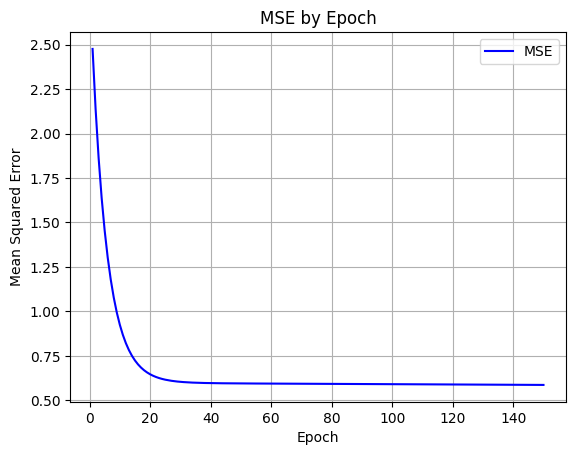

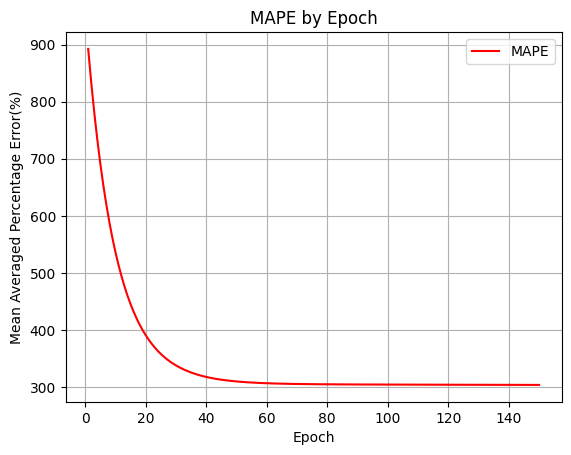

In [153]:
Input = np.column_stack((x1,x2,x3))


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

input_layer_size = 3
hidden_layer_size = 4
output_layer_size = 1

W1 = np.random.rand(hidden_layer_size, input_layer_size)
b1 = np.random.rand(hidden_layer_size)
W2 = np.random.rand(output_layer_size, hidden_layer_size)
b2 = np.random.rand(output_layer_size)

alpha = 1e-4
epochs = 150
MSE_list, MAPE_list = [], []
for epoch in range(epochs):
    MSE, MAPE = 0,0
    for iter in range(samples):
        X = Input[iter]

        Z_tilde = W1@X.reshape(-1,1)+ b1.reshape(-1,1)
        Z = sigmoid(Z_tilde)
        y_pred = W2@Z.reshape(-1,1) + b2.reshape(-1,1)


        J = 1/2*(y_pred-y[iter])**2
        MSE += J
        MAPE += np.abs((y_pred-y[iter])/y[iter])*100


        dJdY = (y_pred-y[iter])
        dJdW2_11, dJdW2_12, dJdW2_13, dJdW2_14 = dJdY*Z[0], dJdY*Z[1], dJdY*Z[2], dJdY*Z[3]
        dJdb2_1 = dJdY
        dJdZ1, dJdZ2, dJdZ3, dJdZ4 = dJdY*W2[0,0], dJdY*W2[0,1], dJdY*W2[0,2], dJdY*W2[0,3]


        dJdW1_11 = dJdZ1 * X[0] * sigmoid_derivative(Z_tilde[0])
        dJdW1_12 = dJdZ1 * X[1] * sigmoid_derivative(Z_tilde[0])
        dJdW1_13 = dJdZ1 * X[2] * sigmoid_derivative(Z_tilde[0])
        dJdW1_21 = dJdZ2 * X[0] * sigmoid_derivative(Z_tilde[1])
        dJdW1_22 = dJdZ2 * X[1] * sigmoid_derivative(Z_tilde[1])
        dJdW1_23 = dJdZ2 * X[2] * sigmoid_derivative(Z_tilde[1])
        dJdW1_31 = dJdZ3 * X[0] * sigmoid_derivative(Z_tilde[2])
        dJdW1_32 = dJdZ3 * X[1] * sigmoid_derivative(Z_tilde[2])
        dJdW1_33 = dJdZ3 * X[2] * sigmoid_derivative(Z_tilde[2])
        dJdW1_41 = dJdZ4 * X[0] * sigmoid_derivative(Z_tilde[3])
        dJdW1_42 = dJdZ4 * X[1] * sigmoid_derivative(Z_tilde[3])
        dJdW1_43 = dJdZ4 * X[2] * sigmoid_derivative(Z_tilde[3])
        dJdb1_1 = dJdZ1 * sigmoid_derivative(Z_tilde[0])
        dJdb1_2 = dJdZ2 * sigmoid_derivative(Z_tilde[1])
        dJdb1_3 = dJdZ3 * sigmoid_derivative(Z_tilde[2])
        dJdb1_4 = dJdZ4 * sigmoid_derivative(Z_tilde[3])

        W1[0][0] += -alpha * dJdW1_11
        W1[0][1] += -alpha * dJdW1_12
        W1[0][2] += -alpha * dJdW1_13
        W1[1][0] += -alpha * dJdW1_21
        W1[1][1] += -alpha * dJdW1_22
        W1[1][2] += -alpha * dJdW1_23
        W1[2][0] += -alpha * dJdW1_31
        W1[2][1] += -alpha * dJdW1_32
        W1[2][2] += -alpha * dJdW1_33
        W1[3][0] += -alpha * dJdW1_41
        W1[3][1] += -alpha * dJdW1_42
        W1[3][2] += -alpha * dJdW1_43
        b1[0] += -alpha * dJdb1_1
        b1[1] += -alpha * dJdb1_2
        b1[2] += -alpha * dJdb1_3
        b1[3] += -alpha * dJdb1_4
        W2[0][0] += -alpha * dJdW2_11
        W2[0][1] += -alpha * dJdW2_12
        W2[0][2] += -alpha * dJdW2_13
        W2[0][3] += -alpha * dJdW2_14
        b2[0] += -alpha*dJdb2_1
    MSE, MAPE = MSE/samples, MAPE/samples
    MSE_list.append(np.squeeze(MSE))
    MAPE_list.append(np.squeeze(MAPE))
    if epoch % 5 == 0 or epoch == epochs-1:
       print('MSE and MAPE at epoch ', epoch, ' :',
             np.squeeze(MSE), ' ,', np.squeeze(MAPE))

plt.figure()
plt.plot(np.arange(1,epochs+1), MSE_list, label='MSE', linewidth=1.5, color='b')

plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE by Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(np.arange(1,epochs+1), MAPE_list, label='MAPE', linewidth=1.5, color='r')

plt.xlabel('Epoch')
plt.ylabel('Mean Averaged Percentage Error(%)')
plt.title('MAPE by Epoch')
plt.legend()
plt.grid(True)
plt.show()

# **문제 2) CNN**
- Data
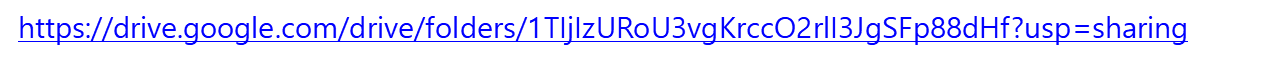

In [76]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [127]:
# 0,1,2,3,4, and 5 finger image data set

train_x = np.load('/content/drive/MyDrive/Colab Notebooks/test/Finger_train_img.npy')
train_y = np.load('/content/drive/MyDrive/Colab Notebooks/test/Finger_train_label.npy')

test_x = np.load('/content/drive/MyDrive/Colab Notebooks/test/Finger_test_img.npy')
test_y = np.load('/content/drive/MyDrive/Colab Notebooks/test/Finger_test_label.npy')

In [128]:
train_x, test_x = train_x/255.0, test_x/255.0


train_x.shape

(900, 100, 100, 1)

In [129]:
train_y.shape

(900, 6)

In [130]:
test_y.shape

(337, 6)

In [133]:
# input layer
input_h = 100    # input height
input_w = 100   # input width
input_ch = 1   # input channel : Gray scale


# 1st convolution layer
k1_h = 3
k1_w = 3
k1_ch = 32
p1_h = 2
p1_w = 2


# 2nd convolution layer
k2_h = 3
k2_w = 3
k2_ch = 64
p2_h = 2
p2_w = 2

# 3rd convolution layer
k3_h = 3
k3_w = 3
k3_ch = 128
p3_h = 2
p3_w = 2

# Fully connected :
conv_result_size = 13 * 13 * 128
n_hidden1 = 100
n_hidden2 = 625
n_output = 6

In [134]:
# Kernel size : [kernel_height, kernel_width, input_ch, output_ch]
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

weights = {
    'conv1' : tf.Variable(tf.random.normal([k1_h, k1_w, input_ch, k1_ch], stddev = 0.1)),
    'conv2' : tf.Variable(tf.random.normal([k2_h, k2_w, k1_ch, k2_ch], stddev = 0.1)),
    'conv3': tf.Variable(tf.random.normal([k3_h, k3_w, k2_ch, k3_ch], stddev=0.1)),
    'hidden1' : tf.Variable(tf.random.normal([conv_result_size, n_hidden1], stddev = 0.1)),
    'hidden2': tf.Variable(tf.random.normal([n_hidden1, n_hidden2], stddev=0.1)),
    'output' : tf.Variable(tf.random.normal([n_hidden2, n_output], stddev = 0.1))
}

# bias size : [output_ch] or [neuron_size]
biases = {
    'conv1' : tf.Variable(tf.random.normal([k1_ch], stddev = 0.1)),
    'conv2' : tf.Variable(tf.random.normal([k2_ch], stddev = 0.1)),
    'conv3' : tf.Variable(tf.random.normal([k3_ch], stddev = 0.1)),
    'hidden1': tf.Variable(tf.random.normal([n_hidden1], stddev=0.1)),
    'hidden2': tf.Variable(tf.random.normal([n_hidden2], stddev=0.1)),
    'output' : tf.Variable(tf.random.normal([n_output], stddev = 0.1))
}

# input layer : [batch_size, image_height, image_width, channels]
# output layer : [batch_size, class_size]
x = tf.placeholder(shape=[None, input_h, input_w, input_ch], dtype=tf.float32)
y = tf.placeholder(shape=[None, n_output], dtype=tf.float32)

In [135]:
def net(x, weights, biases):
    # 1st convolution layer
    conv1 = tf.nn.conv2d(x, weights['conv1'], strides=[1,1,1,1], padding='SAME')
    conv1 = tf.nn.relu(tf.add(conv1, biases['conv1']))
    maxp1 = tf.nn.max_pool(conv1, ksize=[1, p1_h, p1_w, 1], strides=[1, p1_h, p1_w, 1], padding='SAME')

    # 2nd convolution layer
    conv2 = tf.nn.conv2d(maxp1, weights['conv2'], strides=[1,1,1,1], padding='SAME')
    conv2 = tf.nn.relu(tf.add(conv2, biases['conv2']))
    maxp2 = tf.nn.max_pool(conv2, ksize=[1, p2_h, p2_w, 1], strides=[1, p2_h, p2_w, 1], padding='SAME')

    # 2nd convolution layer
    conv3 = tf.nn.conv2d(maxp2, weights['conv3'], strides=[1, 1, 1, 1], padding='SAME')
    conv3 = tf.nn.relu(tf.add(conv3, biases['conv3']))
    maxp3 = tf.nn.max_pool(conv3, ksize=[1, p3_h, p3_w, 1], strides=[1, p3_h, p3_w, 1], padding='SAME')

    maxp2_flatten = tf.reshape(maxp3, [-1, conv_result_size])

    # Fully connected
    hidden1 = tf.add(tf.matmul(maxp2_flatten, weights['hidden1']), biases['hidden1'])
    hidden1 = tf.nn.relu(hidden1)

    hidden2 = tf.add(tf.matmul(hidden1, weights['hidden2']), biases['hidden2'])
    hidden2 = tf.nn.relu(hidden2)

    output = tf.add(tf.matmul(hidden2, weights['output']), biases['output'])

    return output

In [136]:
LR = 0.0001
pred = net(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels=y)
loss = tf.reduce_mean(loss)

optm = tf.train.AdamOptimizer(learning_rate=LR).minimize(loss)

Iter : 0
Train Loss : 4.837610244750977
Cost : 4.887974739074707
Iter : 250
Train Loss : 0.2996293306350708
Cost : 0.41671648621559143
Iter : 500
Train Loss : 0.06763562560081482
Cost : 0.20939692854881287
Iter : 750
Train Loss : 0.02583470195531845
Cost : 0.08504839241504669
Iter : 1000
Train Loss : 0.004613175522536039
Cost : 0.06313655525445938
Iter : 1250
Train Loss : 0.006923711393028498
Cost : 0.3064103126525879
Iter : 1500
Train Loss : 0.0018732612952589989
Cost : 0.2199356108903885
Iter : 1750
Train Loss : 0.0008052435587160289
Cost : 0.19423775374889374
Iter : 2000
Train Loss : 0.0005768573028035462
Cost : 0.2630843222141266
Iter : 2250
Train Loss : 0.0002480419643688947
Cost : 0.11774288862943649


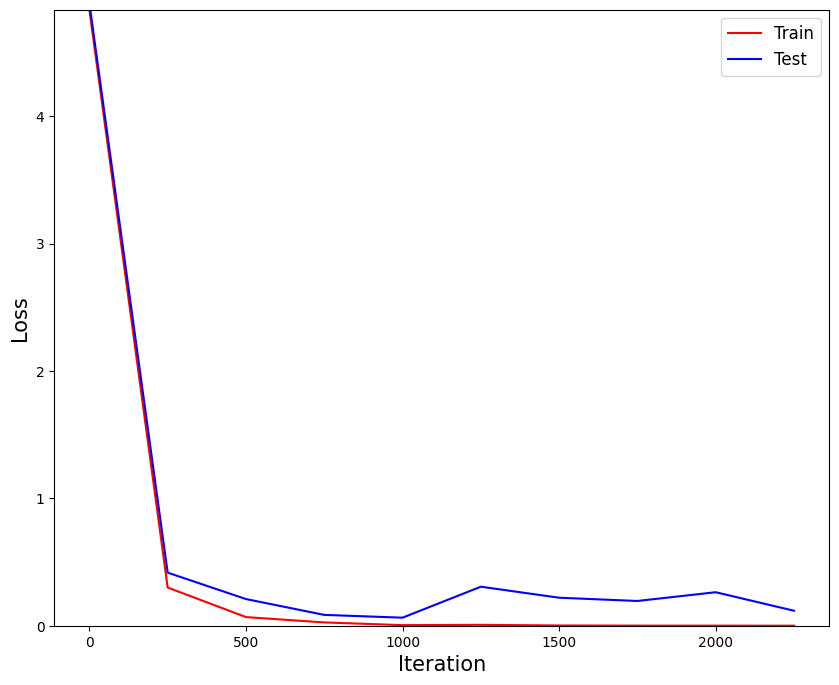

In [137]:
n_batch = 50
n_iter = 2500
n_prt = 250

sess = tf.Session()
sess.run(tf.global_variables_initializer())

loss_record_train = []
loss_record_test = []
for epoch in range(n_iter):
    batch_indices = np.random.choice(train_x.shape[0], size=n_batch, replace=False)
    batch_x = train_x[batch_indices]
    batch_y = train_y[batch_indices]

    sess.run(optm, feed_dict={x: batch_x, y: batch_y})

    if epoch % n_prt == 0:
        test_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
        test_batch_x = test_x[test_indices]
        test_batch_y = test_y[test_indices]


        c1 = sess.run(loss, feed_dict={x: batch_x, y: batch_y})
        c2 = sess.run(loss, feed_dict={x: test_batch_x, y: test_batch_y})

        loss_record_train.append(c1)
        loss_record_test.append(c2)
        print("Iter : {}".format(epoch))
        print("Train Loss : {}".format(c1))
        print("Cost : {}".format(c2))

plt.figure(figsize = (10,8))
plt.plot(np.arange(len(loss_record_train))*n_prt, loss_record_train, 'r', label = 'Train')
plt.plot(np.arange(len(loss_record_test))*n_prt, loss_record_test, 'b', label = 'Test')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend(fontsize = 12)
plt.ylim([0, np.max(loss_record_train)])
plt.show()

In [138]:
test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
test_batch_x = test_x[test_batch_indices]
test_batch_y = test_y[test_batch_indices]

test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))  # Reshape the batch if needed

my_pred = sess.run(pred, feed_dict={x: test_batch_x})

my_pred = np.argmax(my_pred, axis=1)

labels = np.argmax(test_batch_y, axis=1)

accr = np.mean(np.equal(my_pred, labels))
print("Accuracy : {}".format(accr*100))

Accuracy : 96.0


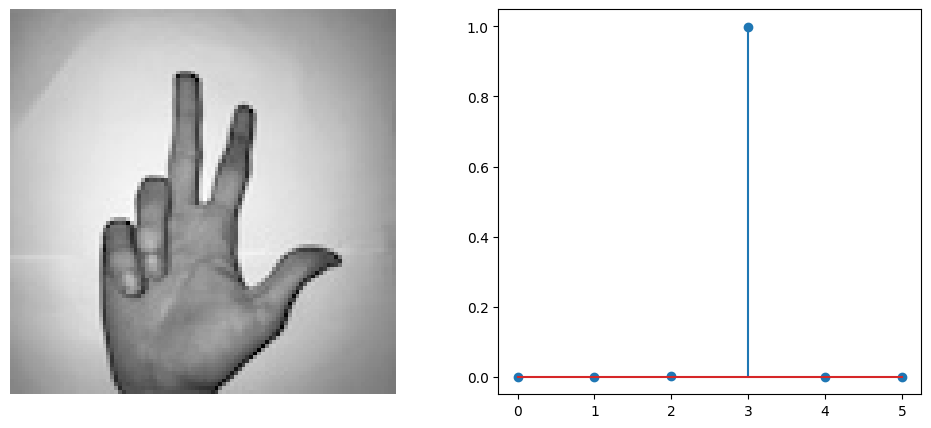

Prediction : 3
Probability : [0. 0. 0. 1. 0. 0.]


In [145]:
n_batch = 1
test_batch_indices = np.random.choice(test_x.shape[0], size=n_batch, replace=False)
test_batch_x = test_x[test_batch_indices]
test_batch_y = test_y[test_batch_indices]

test_batch_x = test_batch_x.reshape((n_batch, input_h, input_w, input_ch))  # Reshape the batch if needed

test_batch_y = tf.keras.utils.to_categorical(test_batch_y, num_classes=10)  # Adjust num_classes if needed

logits = sess.run(tf.nn.softmax(pred), feed_dict={x: test_batch_x})
predict = np.argmax(logits)

plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.imshow(test_batch_x.reshape(100, 100), 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.stem(logits.ravel())
plt.show()

np.set_printoptions(precision = 2, suppress = True)
print('Prediction : {}'.format(predict))
print('Probability : {}'.format(logits.ravel()))

# **문제 3) K-means clustering**

In [159]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
data1 = np.array((np.random.normal(0, 0.2, 100), np.random.normal(0.0, 0.4, 100)))
data2 = np.array((np.random.normal(1.2, 0.3, 100), np.random.normal(1.1, 0.7, 100)))
data3 = np.array((np.random.normal(1.6, 0.2, 100), np.random.normal(1.8, 0.7, 100)))
data4 = np.array((np.random.normal(0.3, 0.1, 100), np.random.normal(0.5, 0.3, 100)))

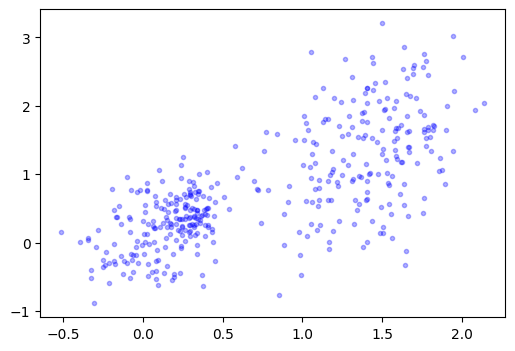

In [160]:
data1 = data1.T
data2 = data2.T
data3 = data3.T
data4 = data4.T

X = np.vstack([data1, data2, data3, data4])
X = np.asarray(X)

plt.figure(figsize = (6, 4))
plt.plot(X[:,0], X[:,1], 'b.', alpha = 0.3)
plt.show()

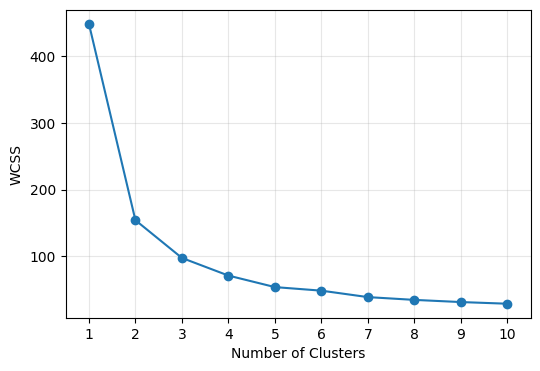

In [162]:
from sklearn.cluster import KMeans

X = np.asarray(X)

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0).fit(X)
    wcss.append(abs(kmeans.inertia_))

plt.figure(figsize = (6, 4))
plt.plot(range(1,11), wcss, 'o-')
plt.plot(2, wcss[2], 'r-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(11))
plt.xlim([0.5, 10.5])
plt.grid(alpha = 0.3)
plt.show()

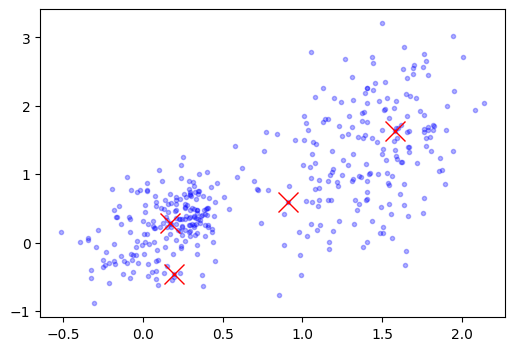

In [163]:
X = np.asmatrix(X)

k=4
m=X.shape[0]

mu = X[np.random.randint(0, m, k), :]
pre_mu = mu.copy()

plt.figure(figsize = (6, 4))
plt.plot(X[:,0], X[:,1], 'b.', alpha = 0.3)
plt.plot(mu[:,0], mu[:,1], 'rx',markersize = 15)
plt.show()

In [164]:
y = np.empty([m,1])

# Run K-means
for n_iter in range(500):
  for i in range(m):
    d0 = np.linalg.norm(X[i,:] - mu[0,:],2) #각 데이터가 클러스터 중심 3개랑 얼마나 가까운지 계산
    d1 = np.linalg.norm(X[i,:] - mu[1,:],2)
    d2 = np.linalg.norm(X[i,:] - mu[2,:],2)
    d3 = np.linalg.norm(X[i,:] - mu[3,:],2)

    y[i] = np.argmin([d0,d1,d2,d3]) #최소 거리 할당

  err=0
  for i in range(k):   #중심점 업데이트
    mu[i,:] = np.mean(X[np.where(y==i)[0],:],axis=0)
    err += np.linalg.norm(pre_mu[i,:] - mu[i,:],2)

  pre_mu = mu.copy()

  if err < 1e-10: #반복횟수 알려주고 수렴하면 종료
    print("Iteration",n_iter)
    break

Iteration 10


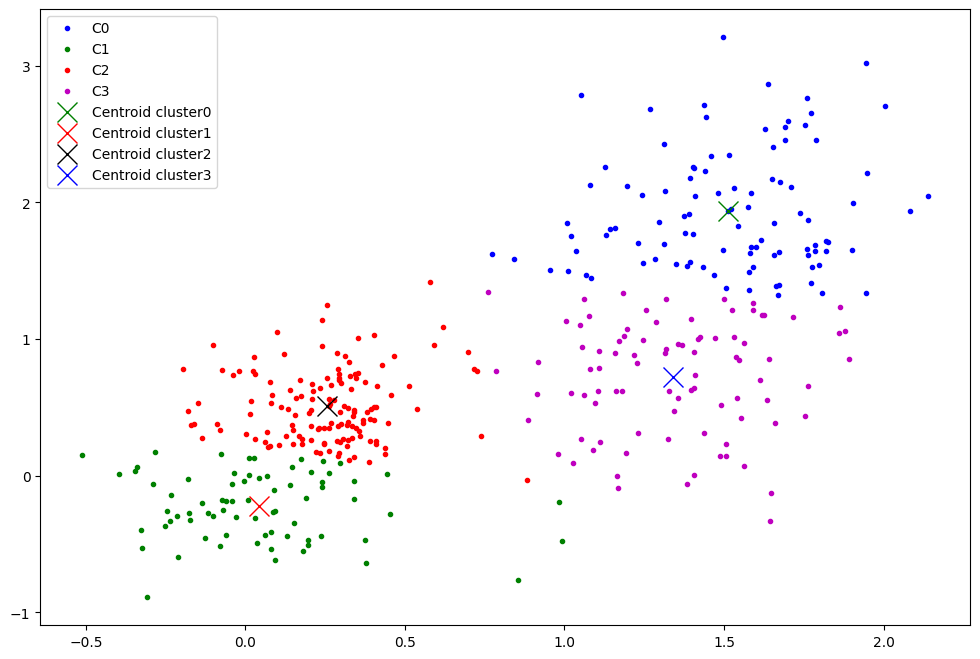

In [169]:
X0 = X[np.where(y==0)[0]]
X1 = X[np.where(y==1)[0]]
X2 = X[np.where(y==2)[0]]
X3 = X[np.where(y==3)[0]]

plt.figure(figsize = (12, 8))
plt.plot(X0[:,0], X0[:,1], 'b.', label = 'C0')
plt.plot(X1[:,0], X1[:,1], 'g.', label = 'C1')
plt.plot(X2[:,0], X2[:,1], 'r.', label = 'C2')
plt.plot(X3[:,0], X3[:,1], 'm.', label = 'C3')
plt.plot(mu[0, 0], mu[0, 1], 'gx', markersize=15, label='Centroid cluster0')
plt.plot(mu[1, 0], mu[1, 1], 'rx', markersize=15, label='Centroid cluster1')
plt.plot(mu[2, 0], mu[2, 1], 'kx', markersize=15, label='Centroid cluster2')
plt.plot(mu[3, 0], mu[3, 1], 'bx', markersize=15, label='Centroid cluster3')
plt.legend()
plt.show()